# Uppercase Words #

Hypothesis: "The model overemphasizes words written in upper case, especially acronyms."
Grund: Statische Analyse"

Reason: Manual Analysis

#### Example ####

ID: 159
Label: False
Prediction: True
Confidence: 0.9195905
Comment: Das bedeutet aber nicht, dass diese Menschen auch der BILD folgen oder das glauben, was in dem Schundblatt steht. Auch ich schaue mir die Artikel gelegentlich an – es ist wichtig, zu wissen, was der Feind so von sich gibt. Und ich gehe davon aus, dass sämtliche Politiker in Deutschland regelmäßig die eigene Propaganda lesen wollen.

ID: 547
Label: False
Prediction: True
Confidence: 0.6642318
Comment: Merkel betreibt eine Grüne Politik. Sie ist eine Grüne Kanzlerin. Und die CDU Basis lässt sich das bieten...

ID: 659
Label: True
Prediction: False
Confidence: 0.73601043
Comment: Merkel hat mit der Grenzöffnung Europa den größten Schaden seit dem 2. WK zugefügt!

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [2]:
def all(c):
    return True

def lowercase_average_word(tokens):
    return lowercase_words(tokens) / len(tokens) * 100
def lowercase_words(tokens):
    counter = 0
    for word in tokens:
        if word.islower():
            counter += 1;
    return counter
def uppercase_average_word(tokens):
    return uppercase_words(tokens) / len(tokens) * 100

def uppercase_words(tokens):
    counter = 0
    for word in tokens:
        if word.text.isupper():
            counter += 1;
    return counter

def generate_filter(fr, to, filter_function = uppercase_words):
    def f(element):
        ld = filter_function(element['tokens'])
        if ld >= fr and ld < to:
            return True
        return False
    return f

def add_filter_interval(filter_list, start, stop, step, func):
    for i in range(start, stop, step):
        filter_list.append(('%s-%s' % (i, i+step-1),generate_filter(i, i+step, func)))

uppercase word count


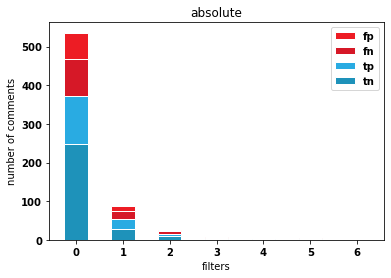

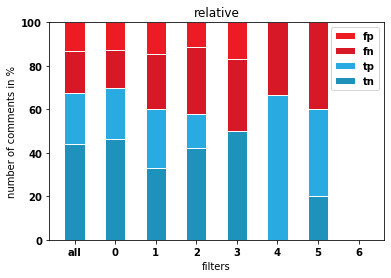

In [4]:
uppercase_filters = []
uppercase_filters.append(('all', all))
step = 1
for i in range(0, 7, step):
    uppercase_filters.append(('%s' % (i),generate_filter(i, i+step, uppercase_words)))

#name, filters, relative
print('uppercase word count')
create_plt(name = "absolute", filters = uppercase_filters[1:], relative = False)
create_plt(name = "relative", filters = uppercase_filters, relative = True)

In [ ]:
print('All')
show_metrics(calc_metrics())
print('1-4')
show_metrics(calc_metrics(generate_filter(1, 20, uppercase_words)))
print('Verbesserung 1-4')
show_metrics(calc_metric_difference(calc_metrics(generate_filter(1, 20, uppercase_words))))

In [ ]:
uppercase_average_filters = []
uppercase_average_filters.append(('all', all))
step = 10
for i in range(0, 100, step):
    uppercase_average_filters.append(('%s-%s' % (i, i+step),generate_filter(i, i+step, uppercase_average_word)))

#name, filters, relative
print('uppercase word count average')
create_plt(name = "Test1 absolute", filters = uppercase_average_filters[1:], relative = False)
create_plt(name = "Test1 relative", filters = uppercase_average_filters, relative = True)

In [ ]:
print('All')
show_metrics(calc_metrics())
print('1-4')
show_metrics(calc_metrics(generate_filter(1, 4, uppercase_average_word)))
print('Verbesserung 1-4')
show_metrics(calc_metric_difference(calc_metrics(generate_filter(1, 4, uppercase_average_word))))